多变量线性回归
=====

# 简介

预测房价，输入变量有两个特征，房子面积，房子卧室数量。输出变量，房子的价格

维度:
| 变量 | 维度  | 备注 | 
| ---  | --- | --- | 
| X | m*n | 47 * 3 注: 在 X 前加一列全1, 作为偏置(bias, 即theta 0)的特征值, 因此n变成3 |
| y | m*1 | 47 * 1|
| theta | n*1 | 3 * 1 |

In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 全局设置
plt.rcParams['figure.figsize']=(16, 8)
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False


# 原始数据

In [226]:
# numpy way
# data = np.loadtxt('ex1data2.txt', delimiter=',')

data = pd.read_csv('ex1data2.txt', names = ['size','bedrooms','price'])



In [227]:
data[:10]


,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [228]:
data.shape


(47, 3)

In [229]:
X=data.iloc[:, :-1]
y=data.iloc[:, -1:]

m = len(data)

print(X.shape, y.shape, m)
# print(X[:10])
# print(y[:10])


(47, 2) (47, 1) 47


#  特征均值归一化

In [230]:
def featureNormalize(X):
    '''
    FEATURENORMALIZE Normalizes the features in X
        FEATURENORMALIZE(X) returns a normalized version of X where
        the mean value of each feature is 0 and the standard deviation
        is 1. This is often a good preprocessing step to do when
        working with learning algorithms.
    '''
    # mu = np.mean(X, axis=0)
    # sigma = np.std(X, axis=0)
    mu = X.mean()
    sigma = X.std()
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


In [231]:
print('Normalizing Features ...\n')
X, mu, sigma = featureNormalize(X)


Normalizing Features ...



# 构建训练集

In [232]:
# 在 X 前加一列 1, 作为偏置(bias, 即theta 0)的x值
# X = np.c_[np.ones(m), X]
X.insert(0, 'ones', 1)

## 转换为numpy 的ndarray
X = X.values
y = y.values
# mu = mu.values
# sigma = sigma.values

print(X.shape)


(47, 3)


In [233]:
iterations = 400
alpha = 0.01  # learning rate

theta = np.zeros((X.shape[1], 1))

print(theta.shape)

print(X[:10])


(3, 1)
[[ 1.          0.13000987 -0.22367519]
 [ 1.         -0.50418984 -0.22367519]
 [ 1.          0.50247636 -0.22367519]
 [ 1.         -0.73572306 -1.53776691]
 [ 1.          1.25747602  1.09041654]
 [ 1.         -0.01973173  1.09041654]
 [ 1.         -0.5872398  -0.22367519]
 [ 1.         -0.7218814  -0.22367519]
 [ 1.         -0.78102304 -0.22367519]
 [ 1.         -0.63757311 -0.22367519]]


# 损失函数

In [234]:
def computeCost(X, y, theta) -> float:
    '''
    COMPUTECOST Compute cost for linear regression:
        J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
        parameter for linear regression to fit the data points in X and y
    '''
    m = len(y) # number of training examples
    A = X @ theta - y   # m*n x n*1 -> m*1
    cost = A.T @ A / (2*m)
    return cost.item()


# 梯度下降函数

In [235]:
def gradientDescent(X, y, theta, alpha, num_iters):
    '''
    GRADIENTDESCENT Performs gradient descent to learn theta
        theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by
        taking num_iters gradient steps with learning rate alpha
    '''
    m = len(y) # number of training examples
    J_history = []
    for i in range(num_iters):
        grad = X.T @ (X @ theta - y) / m
        theta -= alpha * grad
        cost = computeCost(X, y, theta)
        J_history.append(cost)
        # if i % 100 == 0:
        #     print(f'iter: {i} cost: {cost}')
    return theta, J_history


In [236]:
print('\nRunning Gradient Descent ...\n')
# run gradient descent
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)



Running Gradient Descent ...



In [237]:
''' expected
334302.063993
100087.116006
3673.548451
'''
print('Theta computed from gradient descent:\n')
print(theta)

# theta[0] 为 线性方程 y = w*x + b 中的截距b; theta[1] 为系数w


Theta computed from gradient descent:

[[334302.06399328]
 [100087.11600585]
 [  3673.54845093]]


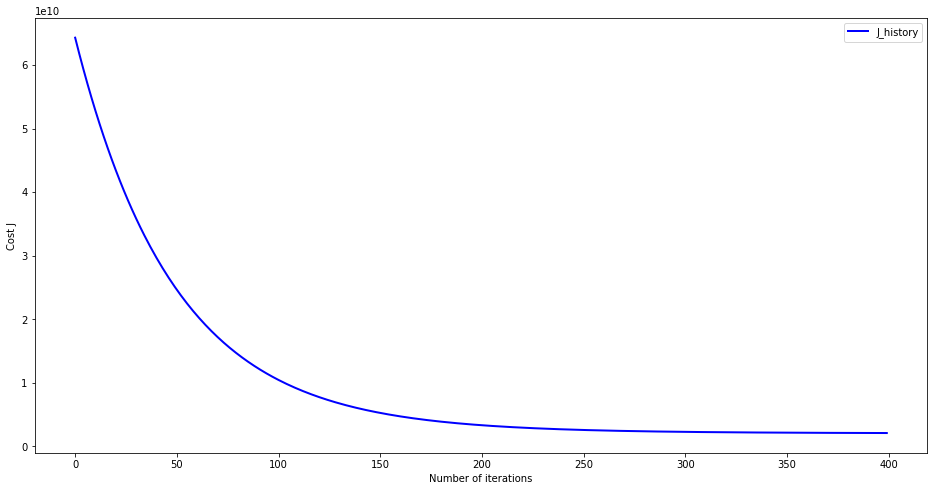

In [238]:
# Plot the convergence graph
plt.plot(range(len(J_history)), J_history, '-b', linewidth=2, label='J_history')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.legend()


In [239]:
# Predict the price of a 1650 sq-ft, 3 br house
predict_price = np.dot(np.r_[1, ([1650, 3] - mu) / sigma ], theta)
print(f'Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n ${predict_price}\n')

# expected: ~ 289314.620338


Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $[289314.62033778]



# 不同学习率下损失函数的迭代 

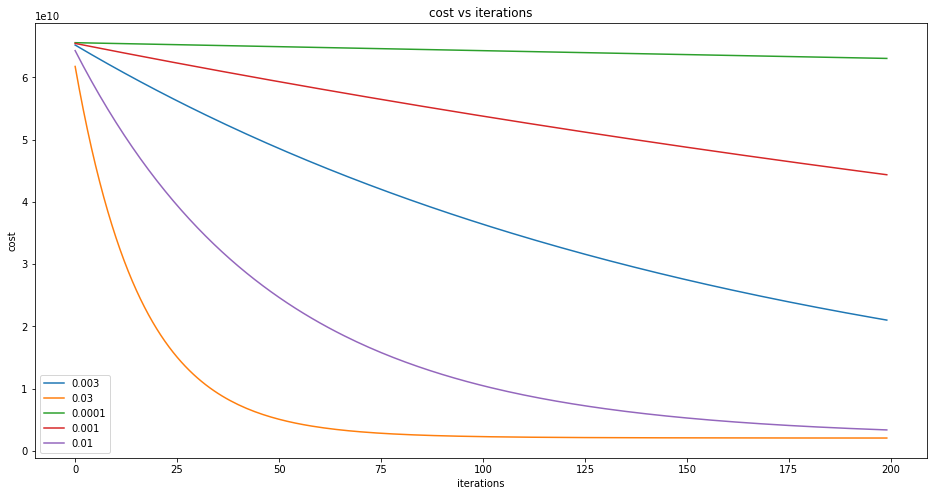

In [241]:
alphas = [0.003,0.03,0.0001,0.001,0.01]
iterations = 200
fig, ax = plt.subplots()
for alpha in alphas: # 迭代不同学习率alpha
    theta = np.zeros((X.shape[1], 1))
    __, costs = gradientDescent(X, y, theta, alpha, iterations) # 得到损失值
    ax.plot(np.arange(iterations), costs, label = alpha) # 设置x轴参数为迭代次数，y轴参数为cost
    ax.legend()  #加上这句  显示label

ax.set(xlabel= 'iterations',   #图的坐标轴设置
       ylabel= 'cost',
       title = 'cost vs iterations')#标题
plt.show()#显示图像


# 使用正规方程直接计theta

原理其实就是对损失函数求导, 导数为0时即为全局最优解.

正规方程中有逆矩阵计算, 如果特征数量很多时, 计算量非常巨大, 不推荐使用.

In [220]:
X=data.iloc[:, :-1]
y=data.iloc[:, -1:]
X.insert(0, 'ones', 1)

X = X.values
y = y.values

m = len(data)


In [221]:
def normalEqn(X, y):
    '''
    NORMALEQN Computes the closed-form solution to linear regression
       NORMALEQN(X,y) computes the closed-form solution to linear
       regression using the normal equations.
    '''
    return np.linalg.pinv(X.T @ X) @ X.T @ y   # return theta


In [222]:
theta = normalEqn(X, y)


In [223]:
''' expected:
 [[89597.90954355]
 [  139.21067402]
 [-8738.01911255]]
'''
print(f'Theta computed from the normal equations: \n {theta}')




Theta computed from the normal equations: 
 [[89597.90954355]
 [  139.21067402]
 [-8738.01911255]]


In [224]:
# Predict the price of a 1650 sq-ft, 3 br house
predict_price = [1, 1650, 3] @ theta
print(f'Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n ${predict_price}\n')

# expected: [293081.46433497]


Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $[293081.46433497]

